**NAME : SAYED SARA SHAUKAT HUSSAIN**

**DATA SCIENCE INTERN @ CodSoft**

**TASK 2: SALES PREDICTION**

### **GitHub Link**

https://github.com/sarasayed7/CodSoft

### **Problem Statement**

**Objective**


The objective of this project is to develop a predictive model that accurately forecasts sales based on the advertising expenditure across different media channels. By analyzing historical advertising data, the model should provide insights into the relationship between advertising spend and sales, enabling businesses to make data-driven decisions on budget allocation.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
sales = pd.read_csv('Advertising.csv')

In [ ]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.shape

(200, 4)

In [ ]:
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualisation

Pairplot

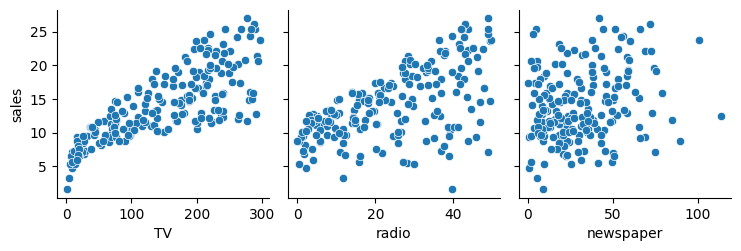

In [ ]:
sns.pairplot(sales, x_vars=['TV','radio','newspaper'], y_vars='sales', kind='scatter')
plt.show()

Histogram

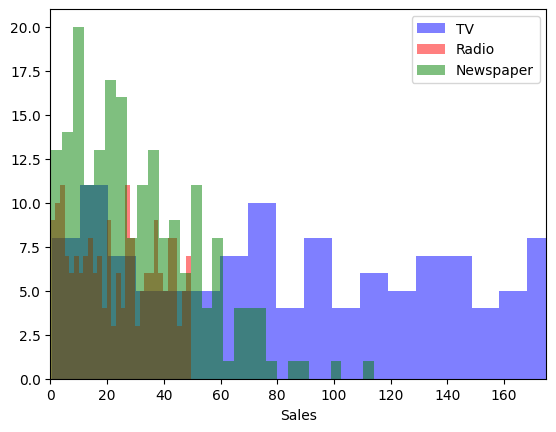

In [ ]:
plt.hist(sales['TV'], bins=30, alpha=0.5, label='TV', color='blue')
plt.hist(sales['radio'], bins=30, alpha=0.5, label='Radio', color='red')
plt.hist(sales['newspaper'], bins=30, alpha=0.5, label='Newspaper', color='green')
plt.legend(loc='upper right')
plt.xlim(0,175)
plt.xlabel('Sales')
plt.show()

Barplot

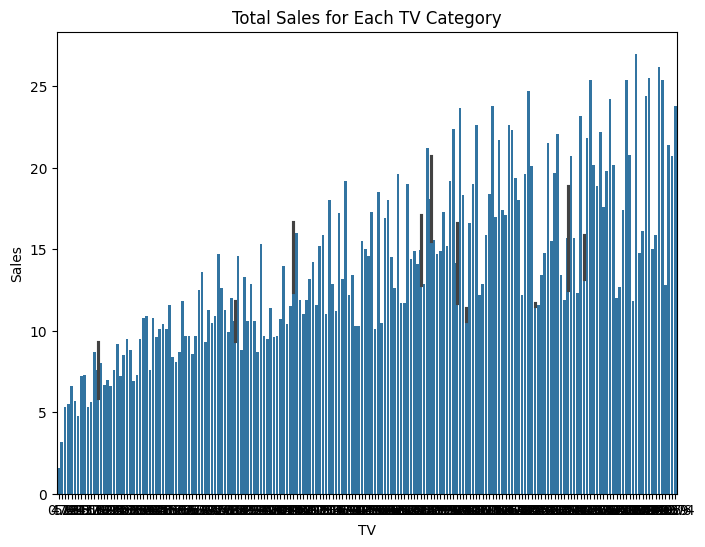

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='TV', y='sales', data=sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Total Sales for Each TV Category')
plt.show()

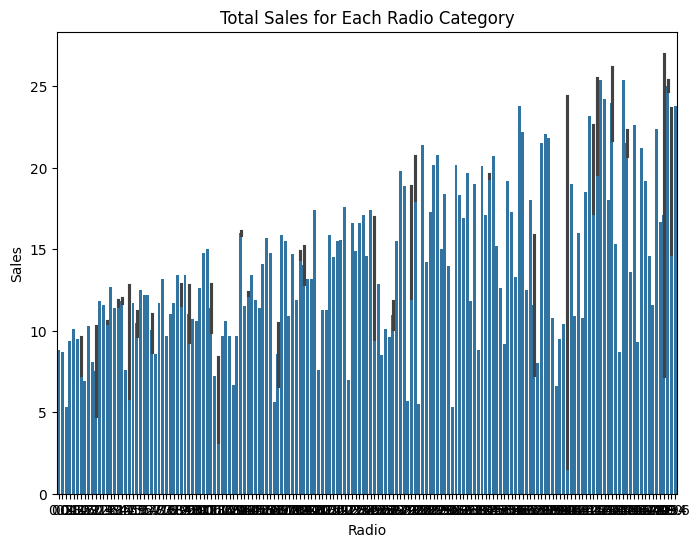

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='radio', y='sales', data=sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Total Sales for Each Radio Category')
plt.show()

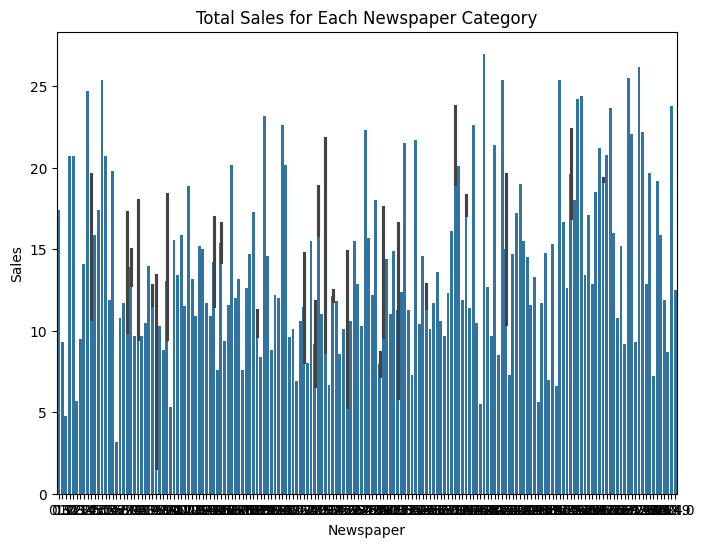

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='newspaper', y='sales', data=sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Total Sales for Each Newspaper Category')
plt.show()

Heatmap

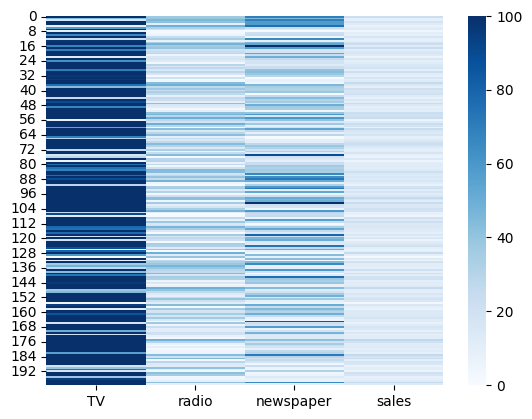

In [ ]:
sns.heatmap(data=sales, cmap='Blues', vmin=0, vmax=100)
plt.show()

### Splitting data into Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X = sales.drop(['sales'], axis=1)
y = sales['sales']

### Scaling dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Note:

Make sure to fit and transform training data.

 And only transform testing data to avoid data leakage.

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


### Import Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(scaled_X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(scaled_X_test)

### Importing metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {MAE}')

Mean Absolute Error: 1.4607567168117606


Mean Squared Error

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 3.174097353976106


Root Mean Squared Error

In [ ]:
RMSE = np.sqrt(MSE)
print(f'Root Mean Squared Error: {RMSE}')

Root Mean Squared Error: 1.7815996615334506


R-squared

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8994380241009119
